# Qualitätsüberprüfung der Messergebnisse

Von: Felix Schulze Sindern

Dieses Notebook ist Grundlage für das Kapitel 3.4 "Qualitätsüberprüfung der Messergebnisse (Felix Schulze Sindern)".

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [3]:
data = pd.read_csv('../quality_check_measurements.csv')
data = data.drop(columns=['runName']).transpose()
data

,0
0,6907
1,6512
2,5959
3,6086
4,6038
...,...
995,6169
996,7264
997,6442
998,6462


## 01: Boxplot und Lageparameter

In [4]:
data1 = data.copy()

In [5]:
# Lageparameter sind hier zu entnehmen
data1.describe()

,0
count,1000.000000
mean,6496.587000
std,491.916625
min,5658.000000
25%,6154.000000
50%,6396.000000
75%,6748.500000
max,9239.000000


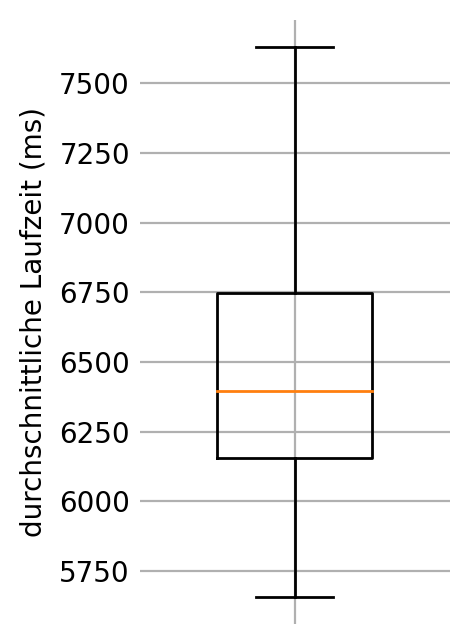

In [6]:
fig, ax = plt.subplots(figsize=(2,4), dpi=200)

boxplot = ax.boxplot(data1, notch=False, showfliers=False, patch_artist=False, vert=True ,widths=0.5, labels=[""])

ax.set(ylabel='durchschnittliche Laufzeit (ms)')

print(ax.get_xlabel())
ax.grid()


for spine in ax.spines.values():
    spine.set_visible(False)

ax.tick_params(axis='both', length=0)

fig.savefig('quality_check_boxplot.svg', dpi=300, bbox_inches='tight', pad_inches=0, format='svg')

## 02: Daten auf Normalverteilung überprüfen

In [7]:
data2 = data.copy()

### 02.1 Ausreißer entfernen

In [8]:
print(len(data2))
data3 = data2.copy()
data3 = data3.sort_values(0)
# data3[0] = data3[0] - min(data3[0])


quantile_threshold = 0.01
minimum_threshold, maximum_threshold = (data3.quantile(quantile_threshold).tolist()[0], data3.quantile(1 - quantile_threshold).tolist()[0])
print(minimum_threshold, maximum_threshold)

data3 = data3.loc[data3[0] > minimum_threshold]
data3 = data3.loc[data3[0] < maximum_threshold]

print(len(data3))


1000
5767.93 8239.369999999999
980


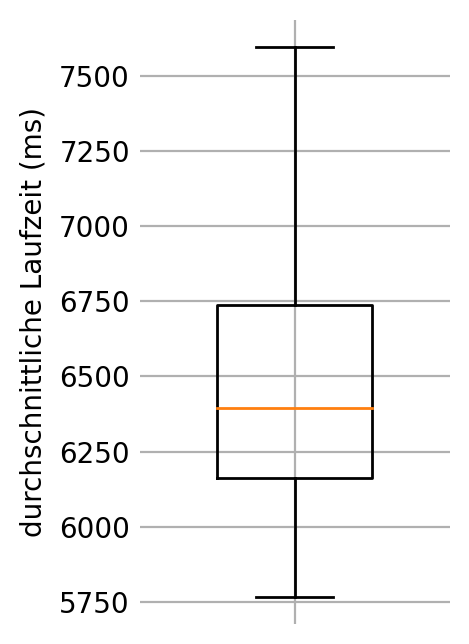

In [9]:
fig, ax = plt.subplots(figsize=(2,4), dpi=200)

boxplot = ax.boxplot(data3, notch=False, showfliers=False, patch_artist=False, vert=True ,widths=0.5, labels=[""])

ax.set(ylabel='durchschnittliche Laufzeit (ms)')

print(ax.get_xlabel())
ax.grid()


for spine in ax.spines.values():
    spine.set_visible(False)

ax.tick_params(axis='both', length=0)

fig.savefig('quality_check_boxplot.svg', dpi=300, bbox_inches='tight', pad_inches=0, format='svg')

### 2.2 Histogramm erstellen

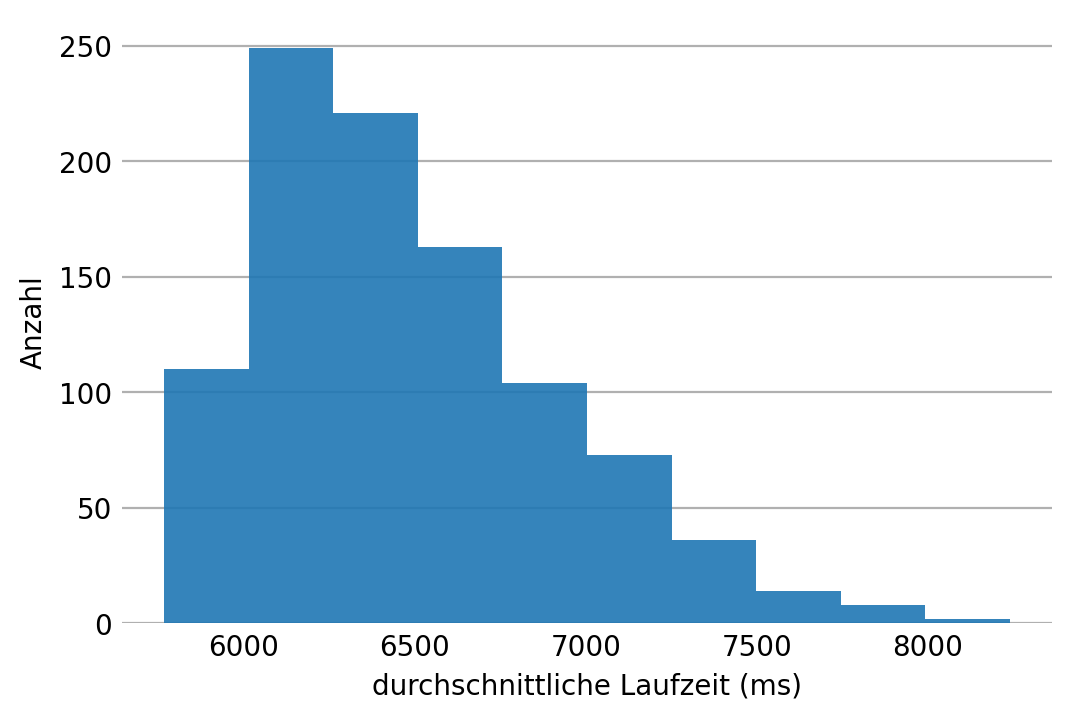

In [10]:
fig, ax = plt.subplots(figsize=(6,4), dpi=200)
ax.hist(data3, zorder=100, alpha=0.9)
ax.set(xlabel='durchschnittliche Laufzeit (ms)', ylabel='Anzahl')

ax.tick_params(length=0)
ax.grid(axis='y', zorder=1)
for spine in ax.spines.values():
    spine.set_visible(False)

fig.savefig('quality_check_hist.svg', dpi=300, bbox_inches='tight', pad_inches=0, format='svg')

### 02.3 QQ-Plot erstellen

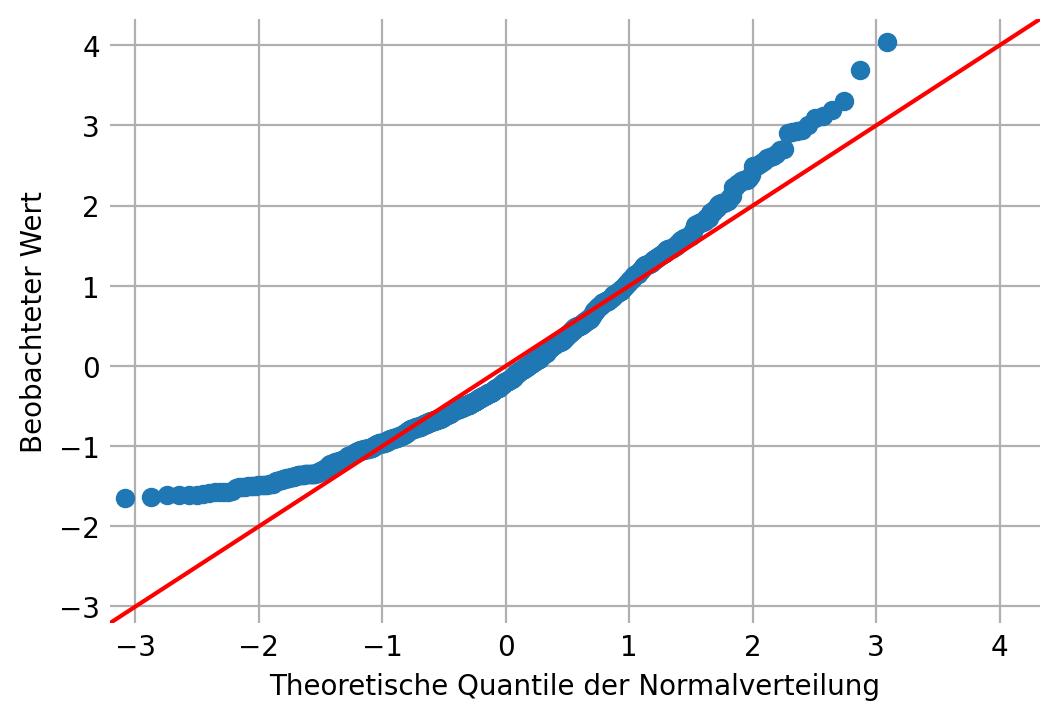

In [11]:
with mpl.rc_context():
    mpl.rc("figure", figsize=(6,4), dpi=200)
    fig = sm.qqplot(data3, line='45',fit=True)
    
    # display(fig)
    axes = fig.axes
    for ax in axes:
        ax.set(xlabel='Theoretische Quantile der Normalverteilung', ylabel='Beobachteter Wert')
        ax.tick_params(length=0)
        ax.grid( zorder=1)
        for spine in ax.spines.values():
            spine.set_visible(False)

    fig.savefig('quality_check_qq_plot.svg', dpi=300, bbox_inches='tight', pad_inches=0, format='svg')

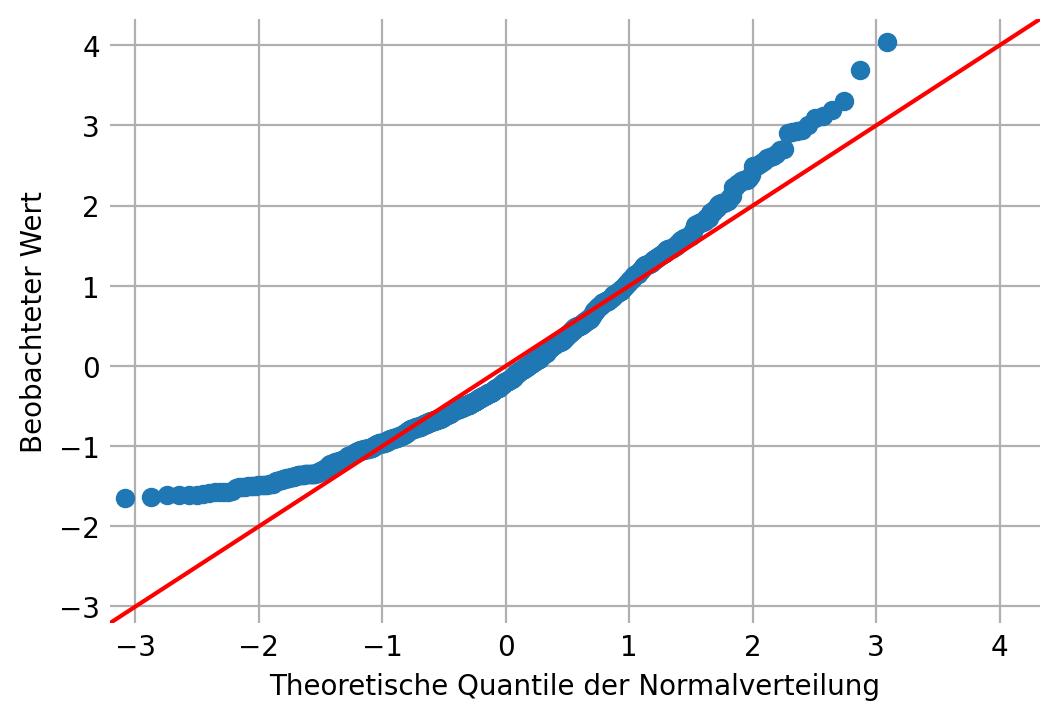

In [12]:
with mpl.rc_context():
    mpl.rc("figure", figsize=(6,4), dpi=200)
    fig = sm.qqplot(data3, line='45',fit=True)
    
    # display(fig)
    axes = fig.axes
    for ax in axes:
        ax.set(xlabel='Theoretische Quantile der Normalverteilung', ylabel='Beobachteter Wert')
        ax.tick_params(length=0)
        ax.grid( zorder=1)
        for spine in ax.spines.values():
            spine.set_visible(False)

    fig.savefig('quality_check_qq_plot.svg', dpi=300, bbox_inches='tight', pad_inches=0, format='svg')

### 03 Dichtefunktion erstellen

In [13]:
data4 = data3.copy()

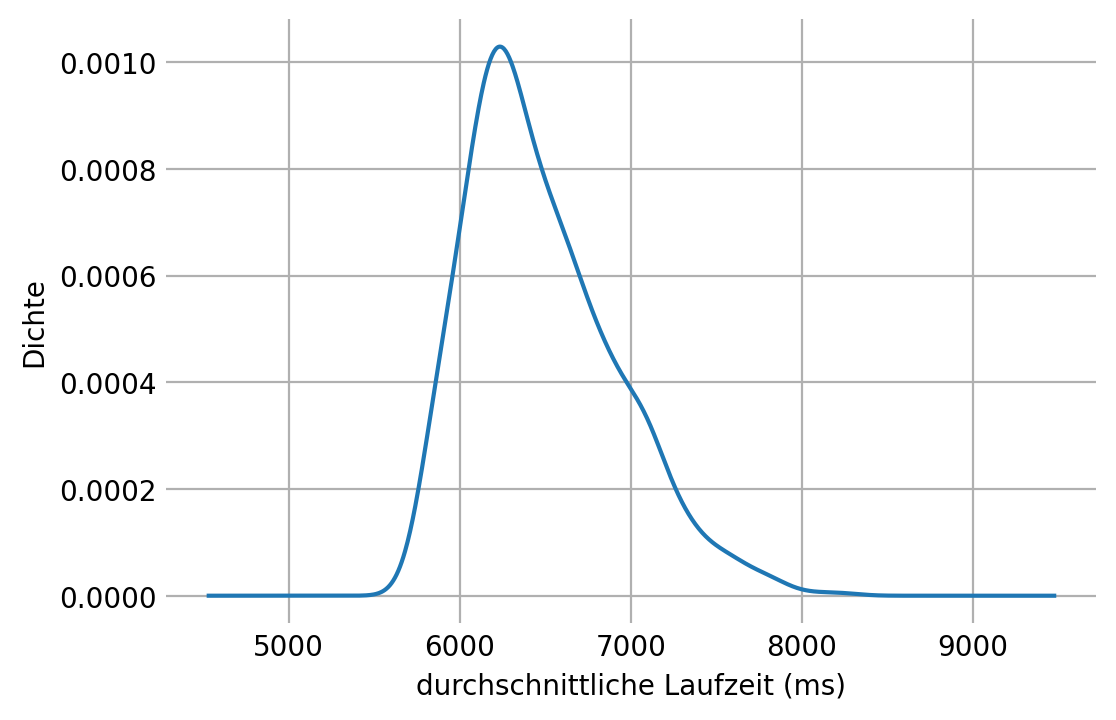

In [14]:
fig, ax = plt.subplots(figsize=(6,4), dpi=200)
ax = data4[0].plot(kind='density')
ax.set(xlabel='durchschnittliche Laufzeit (ms)', ylabel='Dichte')
ax.tick_params(length=0)
ax.grid( zorder=1)
for spine in ax.spines.values():
    spine.set_visible(False)
fig.savefig('quality_check_density_plot.svg', dpi=300, bbox_inches='tight', pad_inches=0, format='svg')

### 04 Kolmogorow-Smirnow-Test durchführen

In [15]:
from scipy.stats import kstest
print(data4[0].min(), data4[0].max())
data5 = data4.copy()

# Daten zwischen 0 und 1 skalieren
min = data5[0].min()
max = data5[0].max()
data5 = data5.applymap(lambda x: (x - min)/(max-min))
data5[0] = data5[0].astype(float)
print(data5[0].min(), data5[0].max())


5768 8239
0.0 1.0


In [16]:
# from numpy.random import seed
# from numpy.random import poisson, negative_binomial, binomial, geometric
# from numpy.random import normal, uniform, chisquare, gamma

# # #set seed (e.g. make this example reproducible)
# seed(0)

# # #generate dataset of 100 values that follow a Poisson distribution with mean=5
# # data = normal(0,1,1000)
# # # data = uniform(0,1,100)
# data = binomial(10, 0.15, 1000000)
# # # data = geometric(0.6, 1000)
# # # data = chisquare(1000, 100)
# # # data = gamma(1,1, 100)
# # data = poisson(1.6, 1000000)
# pd.DataFrame(data).plot(kind='density')
# pd.DataFrame(data).hist()

In [17]:
from scipy.stats import shapiro, anderson, gamma
# perform Kolmogorov-Smirnov test
# print(kstest(data5[0], 'norm'))
# print(shapiro(data5[0]))
# print(anderson(data5[0], dist="logistic"))# 'norm', 'expon', 'gumbel', 'extreme1' or 'logistic'
# KS Test says that there are 2.8101317390639263e-188% chances the two samples come from the same distribution.

#{'a': 3.2331832277450188,'loc': 5678.089203120573,'scale': 248.6162972945291}
# data = gamma(1,1, 100)
# kstest(data5[0], 'gamma', ())

In [18]:
for distribution, args in zip(['norm', 'uniform', 'nbinom', 'poisson', 'binom'], [(),(),(1000, 0.5),(1.9, 1000000),(10, 0.15, 1000000)]):
    print(f"{distribution}: {kstest(data5[0], distribution, args)}")

norm: KstestResult(statistic=0.5000580204686089, pvalue=3.929228111497964e-227)
uniform: KstestResult(statistic=0.37086199919061114, pvalue=1.87635843279385e-121)
nbinom: KstestResult(statistic=1.0, pvalue=0.0)
poisson: KstestResult(statistic=1.0, pvalue=0.0)
binom: KstestResult(statistic=1.0, pvalue=0.0)


### 04 Histogramm und Dichtefunktion in einer Abbildung packen

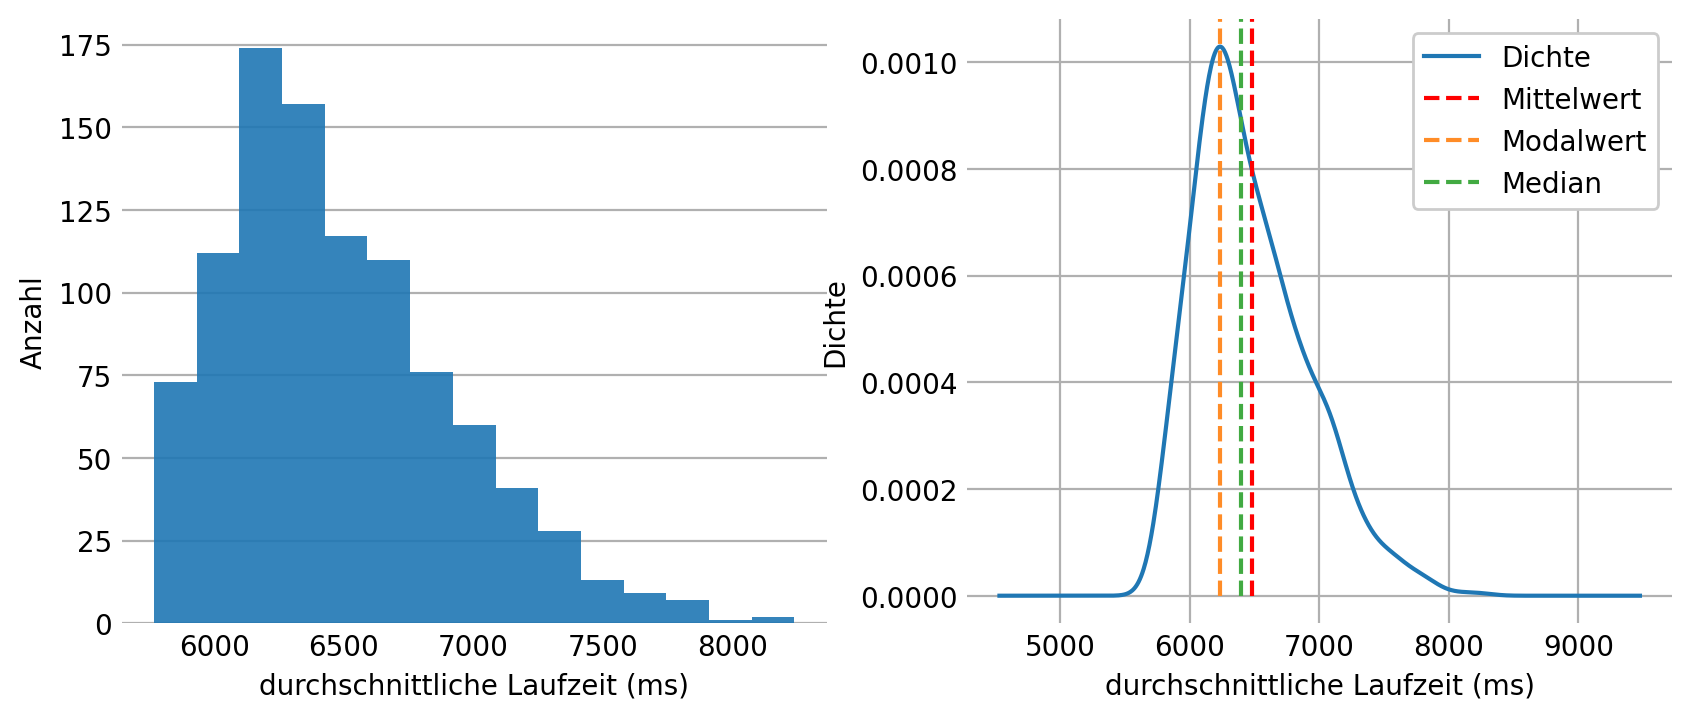

In [34]:
from matplotlib.lines import Line2D
description= data4[0].describe()
metadata = {
    'mean': description['mean'],
    'mode': data4[0].mode()[0],
    'median': description['50%'],
}

figure, axis = plt.subplots(1, 2,figsize=(10,4), dpi=200)
axis[0].hist(data4, zorder=100, alpha=0.9, bins=15)
axis[0].set(xlabel='durchschnittliche Laufzeit (ms)', ylabel='Anzahl')

axis[0].tick_params(length=0)
axis[0].grid(axis='y', zorder=1)
for spine in axis[0].spines.values():
    spine.set_visible(False)

axis[1] = data4[0].plot(kind='density', label='Dichte')
axis[1].set(xlabel='durchschnittliche Laufzeit (ms)', ylabel='Dichte')
axis[1].tick_params(length=0)
axis[1].grid( zorder=1)
axis[1].add_line(Line2D([metadata['mean'], metadata['mean']], [0, 1], color='red', linewidth=1.5, label='Mittelwert', linestyle='--'))
axis[1].add_line(Line2D([metadata['mode'], metadata['mode']], [0, 1], color='#FF8C27', linewidth=1.5, label='Modalwert', linestyle='--'))
axis[1].add_line(Line2D([metadata['median'], metadata['median']], [0, 1], color='#42AA42', linewidth=1.5, label='Median', linestyle='--'))
for spine in axis[1].spines.values():
    spine.set_visible(False)

axis[1].legend(framealpha=1)
for spine in ax.spines.values():
    spine.set_visible(False)
figure.savefig('quality_check_hist_and_density.svg', dpi=300, bbox_inches='tight', pad_inches=0, format='svg')


### 05 Lagemaße auslesen

In [20]:
from scipy import stats
description= data4[0].describe()
metadata = {
    'mean': description['mean'],
    'mode': data4[0].mode()[0],
    'median': description['50%'],
}
print(f"""
Arithmetischer Mittelwert: {description['mean']:.2f}
Geometrischer Mittelwert: {stats.gmean(data4[0]):.2f}
Harmonischer Mittelwert: {stats.hmean(data4[0]):.2f}
Median: {description['50%']}
Unteres Quartil: {description['25%']}
Oberes Quartil: {description['75%']}
Interquartilsabstand: {description['75%'] - description['25%']:.2f}
Modalwert: {data4[0].mode()[0]}
Schiefe: {data4[0].skew():.2f}
""")
# description
print(data1[0].min(), data1[0].max())
print(round(description['mean']))
print(round(description['mean'])-round(description['50%']))


Arithmetischer Mittelwert: 6481.91
Geometrischer Mittelwert: 6467.77
Harmonischer Mittelwert: 6454.05
Median: 6396.0
Unteres Quartil: 6161.25
Oberes Quartil: 6737.25
Interquartilsabstand: 576.00
Modalwert: 6238
Schiefe: 0.80

5658 9239
6482
86


### 06 Streumaße auslesen

In [21]:
description= data4[0].describe()
cv = description['std']/description['mean']
print(f"""
Varianz: {description['std'] ** 2:.2f}
Standardabweichung: {description['std']:.2f}
Variationskoeffizient: {cv * 100:.2f}%
""")
description



Varianz: 189153.91
Standardabweichung: 434.92
Variationskoeffizient: 6.71%



count     980.000000
mean     6481.911224
std       434.918281
min      5768.000000
25%      6161.250000
50%      6396.000000
75%      6737.250000
max      8239.000000
Name: 0, dtype: float64

### 7 Verteilung ermitteln

In [22]:
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions


<class 'pandas.core.frame.DataFrame'>           sumsquare_error          aic           bic  kl_div
skewnorm         0.000002  1720.877963 -19562.432756     inf


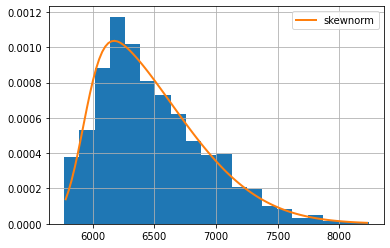

In [23]:
f = Fitter(data4[0],distributions=['skewnorm'])
f.fit()
x = f.summary()
# f.get_best(method='sumsquare_error')
print(type(x),x)

In [24]:
# {'erlang': {'a': 3.2331828192257603,'loc': 5678.089239613628,'scale': 248.61630803641293}}
# {'geninvgauss': {'p': 3.2331831267036892,'b': 0.01763315580733688,'loc': 5678.080586401869,'scale': 2.1919449086429488}}
# {'chi2': {'df': 6.466366586220245, 'loc': 5678.089240389396,  'scale': 124.30814137327002}}
# {'skewnorm': {'a': 5.525793800573069, 'loc': 5926.833269480339, 'scale': 705.0336166625157}}
type(x)

pandas.core.frame.DataFrame

In [25]:
# {'erlang': {'a': 3.2331828192257603,'loc': 5678.089239613628,'scale': 248.61630803641293}}
# {'geninvgauss': {'p': 3.2331831267036892,'b': 0.01763315580733688,'loc': 5678.080586401869,'scale': 2.1919449086429488}}
# {'chi2': {'df': 6.466366586220245, 'loc': 5678.089240389396,  'scale': 124.30814137327002}}
# {'skewnorm': {'a': 5.525793800573069, 'loc': 5926.833269480339, 'scale': 705.0336166625157}}
from scipy.stats import shapiro, anderson, gamma
from scipy.stats import kstest

print(f"gamma: {kstest(data4[0], 'gamma', (3.2331832277450188, 5678.089203120573, 248.6162972945291))}")
print(f"erlang: {kstest(data4[0], 'erlang', (3.2331828192257603, 5678.089239613628, 248.61630803641293))}")
print(f"geninvgauss: {kstest(data4[0], 'geninvgauss', (3.2331831267036892, 0.01763315580733688, 5678.080586401869, 2.1919449086429488))}")
print(f"chi2: {kstest(data4[0], 'chi2', (6.466366586220245, 5678.089240389396, 124.30814137327002))}")
print(f"skewnorm: {kstest(data4[0], 'skewnorm', (5.525793800573069, 5926.833269480339, 705.0336166625157))}")

gamma: KstestResult(statistic=0.022342674849069932, pvalue=0.7034366736028836)
erlang: KstestResult(statistic=0.022342695555114478, pvalue=0.7034355906733307)
geninvgauss: KstestResult(statistic=0.02234268353367097, pvalue=0.70343621939687)
chi2: KstestResult(statistic=0.022342679090543105, pvalue=0.7034364517731733)
skewnorm: KstestResult(statistic=0.01963792362499736, pvalue=0.8367657429021097)


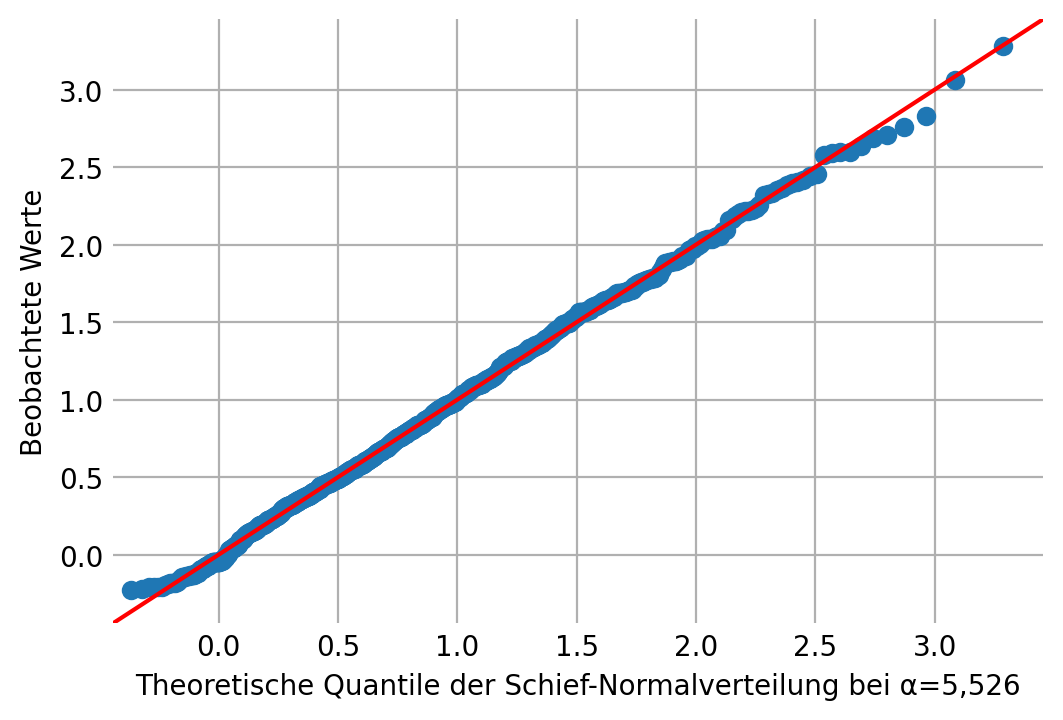

In [36]:
from scipy.stats import skewnorm
with mpl.rc_context():
    mpl.rc("figure", figsize=(6,4), dpi=200)
    fig = sm.qqplot(data4, line='45',fit=True, dist=skewnorm, distargs=(5.525793800573069, 5926.833269480339, 705.0336166625157))
    
    # display(fig)
    axes = fig.axes
    for ax in axes:
        ax.set(xlabel='Theoretische Quantile der Schief-Normalverteilung bei α=5,526', ylabel='Beobachtete Werte')
        ax.tick_params(length=0)
        ax.grid(zorder=1)
        for spine in ax.spines.values():
            spine.set_visible(False)

    fig.savefig('quality_check_qq_plot.svg', dpi=300, bbox_inches='tight', pad_inches=0, format='svg')